PyTorch provides a module nn that makes building networks much simpler. We’ll see how to build a neural network with **784** *inputs*, **192** *hidden units*, **10** *output units* and a `softmax output`.

Note: The softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a `probability distribution` consisting of K probabilities

# Neural Network Architecture

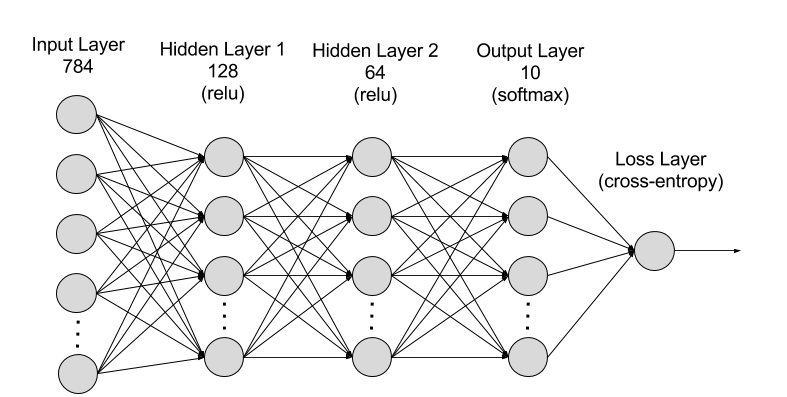

In [1]:
from torch import nn

class Network(nn.Module): # inherit from nn.Module
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden_layer1 = nn.Linear(784, 128)
        self.hidden_layer2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1) # Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.
        
    def forward(self, x): # Forward Method
        # Pass the input tensor through each of our operations
        x = self.hidden_layer1(x)
        x = self.hidden_layer2(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

Here the architecture is inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from nn.Module when creating a class for the network. The name of the class itself can be anything.

`self.hidden = nn.Linear(784, 128)` creates a module for a linear transformation with 784 inputs and 128 outputs and assigns it to self.hidden. The module automatically creates the weight and bias tensors which we'll use in the forward method. Access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.

PyTorch networks created with nn.Module must have a forward method defined. It takes in a tensor x and passes it through the operations defined in the __init__ method.

Here the input tensor x is passed through each operation and reassigned to x. It can be seen that the input tensor goes through the hidden layers, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what the variables were named here, as long as the inputs and outputs of the operations match the network architecture that is intended to be build. The order in which things are defined in the __init__ method doesn't matter, but they need to be sequenced correctly as in the operations in the forward method.

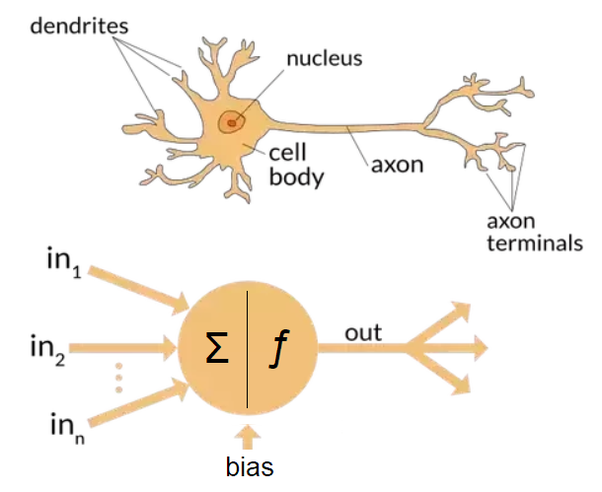

In [2]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden_layer1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_layer2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

A very simple and “naive” neural network which doesn’t know the function mapping the inputs to the outputs has been built. To make it more intelligent, we will train the network by showing it the example of ‘real data’ and then adjusting the network parameters (weight and bias). In short, the accuracy is increased by iterating over a training data set while tweaking the parameters (the weights and biases) of our model.

To find these parameters we need to know how poorly our network is predicting the real outputs. For this we will calculate the cost, which is also called the `loss function`.

# Loss Function

**Cost or loss function** is the measure of our prediction error. By minimizing the loss with respect to the network parameters, we can find a state where the loss is at a minimum and the network is able to predict the correct labels at a high accuracy. The process to find the minimum loss is called gradient descent . 

PyTorch provides losses such as the cross-entropy loss nn.CrossEntropyLoss. 

With a classification problem, the softmax function is used to predict class probabilities.

To calculate the loss, first define the criterion then pass in the output of our network and correct labels.

The nn.CrossEntropyLoss criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.

The input is expected to contain scores for each class. The raw output of the network is the input for the loss function. This raw output is usually called the logits or scores which is used by softmax to calculate the probabilities which will often be very close to zero or one. 

# Gradient Descent

**Gradient Descent** (GD) requires a cost function. The cost function is minimized in order to acquire high prediction accuracy. The whole point of GD is to minimize the cost function. The aim of the algorithm is the process of getting to the lowest error value. To get the lowest error value in the cost function (with respect to one weight), the parameters of the model needs to be tweaked. So, how much are the parameters tweaked? Calculus helps to solve the problem. Using calculus, the slope of a function can be derived. The gradient is the slope of the loss function and points in the direction of fastest change.

Gradient Descent is straightforward to implement for single layer network but for multi-layer network it is more complicated and deeper. Training multilayer networks is done through backpropagation which is really just an application of the chain rule from calculus. It’s easiest to understand by converting a two layer network into a graph representation.

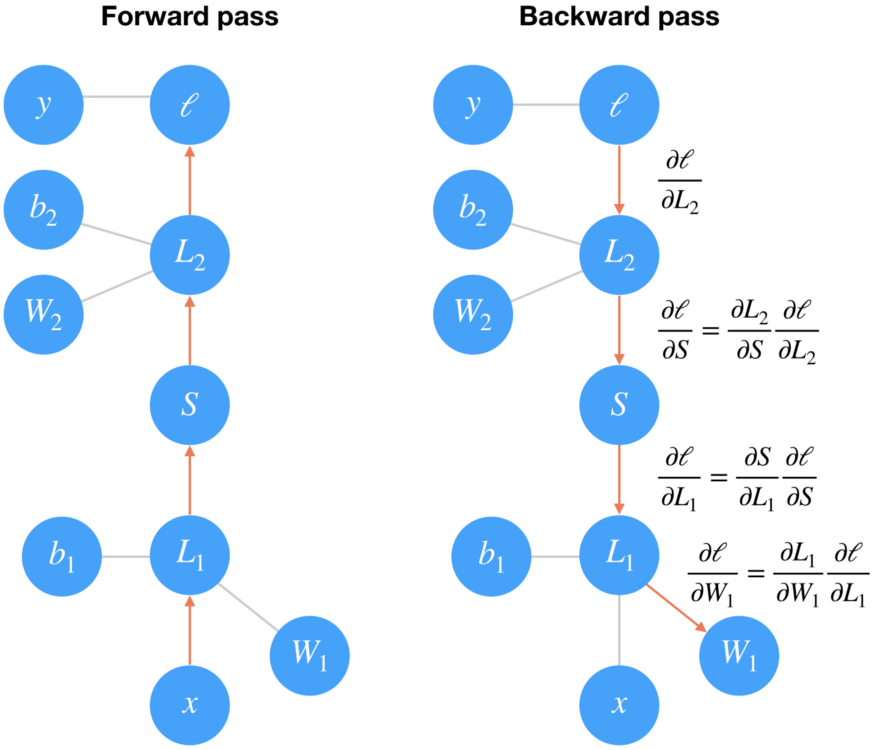

> 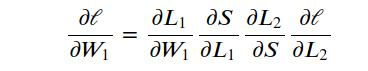

> 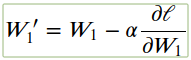

# Neural Network Data Passing

**Forward pass**

**Step 1**: Pass the input 𝑥 through a linear transformation 𝐿1 with weights 𝑊1 and biases 𝑏1

**Step 2**: The output then goes through the sigmoid operation 𝑆 and another linear transformation 𝐿2

**Step 3**: Finally, calculate the loss ℓ.
Use the loss as a measure of how bad the network’s predictions are. The goal then is to adjust the weights and biases to minimize the loss.

**Backward pass**

**Step 1**: To train the weights with gradient descent, propagate the gradient of the loss backwards through the network.

**Step 2**: Each operation has some gradient between the inputs and outputs.

**Step 3**: As the gradients are sent backwards, the incoming gradient is multiplied with the gradient for the operation.

Mathematically, this is really just calculating the gradient of the loss with respect to the weights using the chain rule.


# Learning Rate


Update weights using this gradient with some `learning rate α`.

The `learning rate α` is set such that the weight update steps are small enough that the iterative method settles in a minimum.

# Partial Derivatives with Autograd

Torch provides a module called autograd to calculate the gradients of tensors automatically. It is kind of engine which calculates derivatives. It records a graph of all the operations performed on a gradient enabled tensor and creates an acyclic graph called the dynamic computational graph. The leaves of this graph are input tensors and the roots are output tensors.
Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way.

To make sure PyTorch keeps track of operations on a tensor and calculates the gradients we need to set requires_grad = True. We can turn off gradients for a block of code with the torch.no_grad().

# Optimizer

Lastly an optimizer is used to update the weights with the gradients. We get these from PyTorch’s optim package. For example, stochastic gradient descent with optim.SGD is used.

# **Process of training a neural network**
1. Make a forward pass through the network
2. Use the network output to calculate the loss
3. Perform a backward pass through the network with loss.backward() to calculate the gradients
4. Take a step with the optimizer to update the weights

# Loading data to train and test vanilla model

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
# Define the loss
criterion = nn.NLLLoss()

# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: -0.10119424698385857
Training loss: -0.10273549556414456
Training loss: -0.10446041808135982
Training loss: -0.10644250464782531
Training loss: -0.10880673355829995
Training loss: -0.11179840030954845
Training loss: -0.11579061066036794
Training loss: -0.12140340093515321
Training loss: -0.12930450116647585
Training loss: -0.14062293521217953
